# Introduction

This blog aims to provide a brief overview of the creation of a machine learning workflow from creating a dataset up to the stage of training a model. I have started a project to develop a neural network eye-tracking model to replace the mouse and this is a series of blogs of the journey, see the  [introduction to the project here](posts\eye_tracking_start\eye_tracking.qmd).

I will start the process by creating a dataset using the hugging faces dataset Python library. I will give a go over why it's worth taking the time to learn what hugging face is and what it offers. We will then talk about how to transform the data into a format that can be used by PyToch and how to use the Pytorch dataloader to pass the data to the Pytorch training loop. Finally, we pass the data to a Pytorch training loop. The aim of this is not to create an optimised model but to show the pipeline up to the model.

# What is hugging face 


![](C:\development\github projects\AlexPaulKelly\docs\posts\hugging_face_datasets_library\ac04bdd3-4808-4fd1-ad9c-58953c15684c.webp)


Hugging Face is a pivotal open-source AI hub, offering more than just a repository for models, datasets, and scripts. It’s a collaborative platform for AI professionals and enthusiasts, featuring tools like Gradio and comprehensive resources for machine learning. Hugging Face has 496,981 models, 104,714 datasets, and over 150k demo apps (Spaces).

They aim to make it easy for people to do anything machine learning and build a community around it. Hugging Face employees and users alike create blogs and tutorials, share papers and are hosted on the site. They have a discord and a forum that will help you with any questions you have and have open-source libraries to make it easy to get started in machine learning.

- **Models** it has various ways for you to model, and download on your personal computer/laptop, serverless end point which is dynamically loaded on shared infrastructure, inference endpoint, integrations with other platforms like AWS, and Azure, and convert to a space.<br>
- **Spaces** is a hosted area to place your models. This is a good way to create a portfolio of all your work and share it with the world free of cost. You can collaborate with other people using git and use front-end libraries like streamlit and gradio to make it easy to use.<br>
- **Libraries** are a place to find all the open-source libraries that Hugging Face has created and has links to. They have a large collection of libraries that are used to make it easy to get started in machine learning. They have libraries for natural language processing, computer vision, and more.<br>
- **Datasets** is a place to find datasets and share your own. You can also use the datasets to train your models. They have a large collection of datasets and you can also use the datasets to train your models. There's more coverage of datasets in the next section as it's the main focus of this notebook.

## How does Hugging Face compare to the competition

The Hugging Face dataset library does have some competition in Kaggle which is also a machine learning platform which Hosts Datasets, Notebooks and competitions and is more oriented to competitions and using notebooks on their platform. The hugging face dataset library is more oriented to datasets and has a large number of datasets that are ready to use and prebuilt piplines that you can use own hardware or another platform.  The [kaggle python api can be found here](https://github.com/Kaggle/kaggle-api)


The dataset library also has some competition in  pytorch and tensorflow.  The pytorch dataset library can be [found here](https://pytorch.org/docs/stable/data.html) and the tensorflow dataset library can be [found here](https://www.tensorflow.org/datasets/catalog/overview) but are more geared at using their frameworks.

# Hugging faces key libaries 


## Hugging Python client library

Hugging Python client library allows you to manage all things hugging face hub and is aimed at individuals and teams collaborating on shared machine learning projects. You can create new repositories, download files from the hub, upload to the hub, search for models and run inference (run queries against models) and deploy models. See the [quick start guide here for more information](https://huggingface.co/docs/huggingface_hub/quick-start)

### Hugging face Transformers 


The library here is a wide-ranging library, originally intended for NLP tasks but has since expanded to computer vision, audio and multimodal. Its a high-level API that allows you to use pretrained models and fine-tune among other features. The list of supported models and frameworks can be found [here](https://huggingface.co/docs/transformers/index).  The library compatable of jax, Pytorch and TensorFlow.  

Some of the key features include:
 - [pipelines is a high-level, easy-to-use, API for doing inference over a variety of downstream-tasks](https://huggingface.co/docs/transformers/main_classes/pipelines)
 - [Trainer is a high-level API for PyTorch that makes training a much simpler task](https://huggingface.co/docs/transformers/main_classes/trainer)
 - [Quantization for reducing memory requirements and inference speed](https://huggingface.co/docs/transformers/main_classes/quantization)
 
 - and many more

 ###  Gradio 


Gradio is an open-source Python library that allows you to quickly create UIs for your machine-learning models. It allows you to create a UI for your model in 3 lines of code making it easy to showcase your work. It also allows you to share your model with others. It can be used locally and Hugging Face has a tight integration where you can host on Hugging Face for free. It has several features including:

- [Create a UI for your model in 3 lines of code](https://gradio.app/getting_started)
- [one of the new features is the chat interface to help with the growth of all the language models](https://www.gradio.app/docs/chatinterface)
- [share your model with others](https://gradio.app/getting_started)

###  Hugging Face Diffuers


This model is the go-to library for pre trained diffusion for generating for images, audio and 3d structures of modecules. It has high level pipeline api for creating inference with just a few lines of code. It has interchangeable noise schedulers for balancing speed and quality and pretrained models that can be used as a starting point for your own models.  ["find more informatiohn here"](https://huggingface.co/docs/diffusers/index).

and finally, the last library we will talk about in more detail is the datasets library.

# Datasets

## Overview 


The purpose of the hugging face datasets is to make it easy to access and share and shape datasets. The library is the backbone of the hugging face hub and is used to organise, and transfer the datasets so they can be used within a machine learning pipeline. Nearly every deep learning workflow starts with a dataset so understanding the hugging face datasets library is important to aquire data training and fine-tuning models. Once you have a dataset, the next step is to pass this to a dataset loader, this could be in pytorch or Tensorflow or just use with one of the higher level APIs that hugging face provides (e.g. transformer python library) and you wont need to worry about the underlying architecture.

Hugging faces dataset library is built on top of Apache Arrow making it fast and efficient for data loading and supporting caching making it even more efficient. Arrow allows fast processing and is column-oriented, memory mapping and gives incredible performance gains. It includes features for processing and preparing data, like filtering, splitting, and shuffling.

## Why use Hugging Face datasets library


In simple terms, the Hugging Face dataset library gives you everything you need to use an existing dataset or create datasets and get straight into the machine learning pipeline.  [find more information here](https://huggingface.co/docs/datasets/index).  Its platform agnostic and can be used with any framework, for example, you can pass to Pytorch or Tensorflow. It has a large number of datasets that are ready to use and can be used with the Transformers library. It's well-documented and has a large community that can help you with any questions you have. Get started with just 3 lines of code, load a dataset and start exploring in your notebook or script. The code below will show the beans dataset, you can also view the dataset in the hugging face hub [here](https://huggingface.co/datasets/beans).

In [201]:
#| echo: True
#| output: False
# install and import the necessary libraries
!pip install datasets[vision] 
from datasets import load_dataset, Image 
# Downloads the dataset called beans
dataset = load_dataset("beans", split="train")

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


# How to transform the dataset into a format that can be used by the model

I found the transform part of the dataset library the most confusing part of the library. There are lots of ways to transform the data using the hugging face dataset library but also incorporating other libraries like Pytorches transformations or tensor flow. Understanding the different ways to transform and which one is the best is an important skill to master. Here are some of the ways you can use the hugging face library to transform data :

- [Reordering Rows and Splitting the Dataset](https://huggingface.co/docs/datasets/process)<br>
- [Renaming and Removing Columns](https://huggingface.co/docs/datasets/process)<br>
- [Applying Processing Functions to Each Example](https://huggingface.co/docs/datasets/process)<br>
- [Concatenating Datasets](https://huggingface.co/docs/datasets/process)<br>
- [Applying a Custom Formatting Transform](https://huggingface.co/docs/datasets/quickstart)<br>
- [Applying Transforms to Images](https://huggingface.co/docs/datasets/use_dataset)<br>
- [Data Augmentation](https://huggingface.co/docs/datasets/use_dataset)<br>
- [Exporting a Dataset](https://huggingface.co/docs/datasets/v2.16.1/process)<br>



We've already imported dataset using the hugging face library.  The next step is to pass this over to pytorch so we can train our model but we could pass this over to tensorflow if required.  Before we pass it over we need to transform the data to tensors instead of PIL.jpeg format as shown below.

In [202]:
dataset["image"][:5]

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500>]

This requires importing transforms from the torchvision library from pytorch, this will do the transformations.  Create a function to convert jpg into Tensors and then pass this function to datasets object using the with_transform function.  This will then format the data into a format that can be used by pytorch.  The code below and further comments will show how to do this along with the results of the transformation and the data types produced.

In [212]:
# creates a ToTensor object that converts the image to a tensor
from torchvision import transforms
to_tensor = transforms.ToTensor()

In [213]:
# creates a function that takes in a batch and returns the batch a tensors (previously images were in PIL format)
def transform_images(batch):
    batch['image'] = [to_tensor(image) for image in batch['image']]
    return batch

In [214]:
# Executes what we have set above the transform on the dataset, the returning dataset[image] will be a tensor  
dataset = dataset.with_transform(transform_images)

In [215]:
# now we can access the first image as a tensor
dataset[0]["image"]

tensor([[[0.2196, 0.2196, 0.2196,  ..., 0.8078, 0.2627, 0.2118],
         [0.2118, 0.2157, 0.2157,  ..., 0.6706, 0.3843, 0.2000],
         [0.1961, 0.2000, 0.2039,  ..., 0.6706, 0.3961, 0.3294],
         ...,
         [0.2196, 0.1882, 0.2275,  ..., 0.5804, 0.6353, 0.5529],
         [0.1961, 0.1922, 0.2706,  ..., 0.6196, 0.5843, 0.6157],
         [0.2275, 0.2118, 0.1882,  ..., 0.5647, 0.6196, 0.6000]],

        [[0.1490, 0.1490, 0.1490,  ..., 0.6039, 0.0667, 0.0196],
         [0.1412, 0.1451, 0.1451,  ..., 0.4980, 0.2078, 0.0314],
         [0.1333, 0.1373, 0.1412,  ..., 0.5216, 0.2510, 0.1882],
         ...,
         [0.1020, 0.0706, 0.1098,  ..., 0.7020, 0.7569, 0.6745],
         [0.0784, 0.0745, 0.1529,  ..., 0.7255, 0.6824, 0.7137],
         [0.1098, 0.0941, 0.0706,  ..., 0.6471, 0.7020, 0.6784]],

        [[0.0078, 0.0078, 0.0078,  ..., 0.5490, 0.0314, 0.0039],
         [0.0000, 0.0039, 0.0039,  ..., 0.3843, 0.1255, 0.0000],
         [0.0000, 0.0039, 0.0078,  ..., 0.3804, 0.1373, 0.

In [216]:
# Prints the labels of the first image, notice the value isnt a torch tensor
dataset[0]["labels"]

0

In [218]:
# its a python int type
type(dataset[0]["labels"])

int

In [221]:
# sets the output of the dataset to be a torch tensor
dataset.set_format(type='torch', columns=['image', 'labels'])

In [222]:
# now we can access the first element of the dataset as a tensor
dataset[1]["labels"]

tensor(0)

In [224]:
# The datatype is a torch tensor type
dataset[1]["labels"].type()

'torch.LongTensor'

# Creating a hugging face dataset from scratch

## Create the dataset

For this I will be using a dataset ive created myself for mapping pictures of me looking at the screen and co-ordinates on screen.  The data was collected by writing a program that placed “x” on the screen at random coordinates. The program then recorded the coordinates of the “x” and a picture of the user’s face. The program then saved the image and named the file as the coordinates of the “x”. The process was repeated until the model was able to predict the coordinates of the “x” with a high degree of accuracy.

In [225]:
#| echo: True
#| output: False
import os
import sys
from datasets import Dataset, Image
import torch

In [ ]:
#| echo: True
#| output: False
# dataset location on my drive 
data_science_folder = 'G:\My Drive\Learning\data_science'
sys.path.append(data_science_folder)
dataset_path = data_science_folder + "\datasets_folder\gaze-points\work-laptop"

A typical file name looks like the :

- 20240123-140252-hieght2560-width1440-computerwork-laptop_2232_230.png

with the targets (the pixel im looking at on screen) in the file name and the file contents is a image of me looking at the screen.  The last 2 numbers 2232 and 230 are the pixel co-ordinates that need to be stripped out of the file name.  Below, ill detail how to strip out the co-ordinates.

In [227]:
# extracts screen coordinates from the filenames and stores in a list of tensors
label_tensors = [torch.tensor([int(f.split('_')[-2]), int(f.split('_')[-1].split('.')[0])]) for f in os.listdir(dataset_path) if os.path.isfile(os.path.join(dataset_path, f))]

In [228]:
# get the last 20 elements for testings purposes
label_tensors = label_tensors[:20]

We have imported the dataset using the hugging face library.  The next step is to get a list of the full file names to pass to the Dataset object to be load the images.

In [229]:
# gets a list of all images in a directory and stores in a list of strings
image_files = [os.path.join(dataset_path, f) for f in os.listdir(dataset_path) if os.path.isfile(os.path.join(dataset_path, f))]

In [230]:
image_files = image_files[:20]

In [231]:
# confirm that the length of the labels and images are the same so they can be paired together during the creation of the dataset
len_image_files = len(image_files)
len_labels = len(label_tensors)

print(f"confirm length of labels {len_labels} and length of image_files {len_image_files} are the same")

confirm length of labels 20 and length of image_files 20 are the same


Load the images and cast (use the pil library to convert the images)

In [232]:
# create the dataset from the image files and labels
dataset = Dataset.from_dict({"image": image_files}).cast_column("image", Image())

In [233]:
# create a new dictionary with the images and labels
# i'm not happy with having to add the labels to the dataset after as it takes alot longer
# but i'm not sure how to do it in the the from_dict method above.
updated_dataset_dict = {"image": dataset["image"], "label": label_tensors}
updated_dataset = Dataset.from_dict(updated_dataset_dict)

In [234]:
updated_dataset

Dataset({
    features: ['image', 'label'],
    num_rows: 20
})

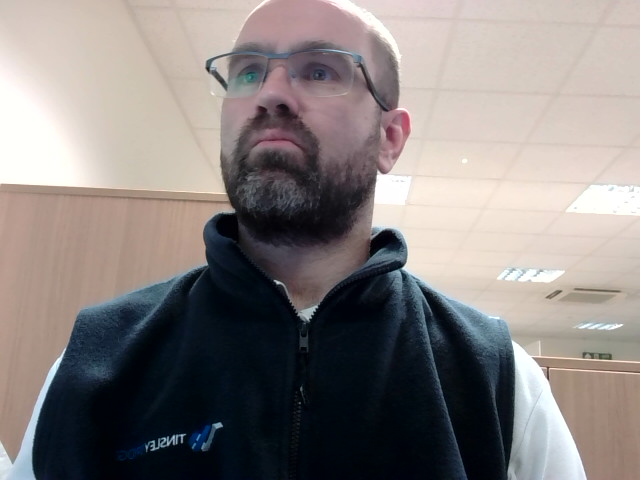

In [235]:
updated_dataset["image"][1]

In [236]:
updated_dataset["label"][1]

[526, 1015]

## Transforming the dataset into tensors ready for pytorch

We will need to transform the data to tensors instead of PIL.jpeg format and the labels will need to be tensors.  You can see from viewing the first element in the cell above that its a list of 2 integers.  The image above is a picture of me looking at the screen.  We now need to convert the labels and images to tensors using pytorches vision library.  We can then pass this to the dataset object using the with_transform function.

There a couple of ways to do this in hugging face datasets library.  The first is to use the map function and the second is to use the with_transform function.  The map function is applies straight away but consumes a lot of memory and the with_transform function is applied when the data is loaded (or requested from the dataset object).  The with_transform function is the best option for large datasets.  The with_transform method is shown below.

### Create a tensor from a list of integers

A detailed pytorch tensor is out of the scope of this notebook but you can find more information [here](https://pytorch.org/docs/stable/tensors.html).  In simple terms, a tensor is a multi-dimensional array that can be used to store and process data. Below is a simple example of how to create a tensor from a list of integers and show the tensor datatype and the tensor itself.


In [237]:
# example of how to use the torch stack function
# The following will take a list of inter 
list_of_ints_1 = [1, 2, 3, 4, 5]
list_of_ints_2 = [6, 7, 8, 9, 10]
list_of_ints_3 = [11, 12, 13, 14, 15]
pytorch_stacked = torch.stack([torch.tensor(list_of_ints_1), torch.tensor(list_of_ints_2), torch.tensor(list_of_ints_3)], dim=0)

In [238]:
# the resulting tensor will be a 3x5 tensor
pytorch_stacked

tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10],
        [11, 12, 13, 14, 15]])

In [239]:
# pick out the first element of the first row
pytorch_stacked[0][0]

tensor(1)

In [240]:
# shows the stored datatype of the tensor
pytorch_stacked[0][0].type()

'torch.LongTensor'

## Using Hugging Faces with_tranform with pytorch vision library to transform the data

The Hugging Faces with_transform is applied on-the-fly on batches of data when iterating over the dataset. The with_transform function is the best option for large datasets.

The PyTorch vision library is comprehensive and consists of popular datasets, model architectures, and common image transformations for computer vision. Tensor images are expected to be of shape (C, H, W). The torchvision ToTensor() transform the pil/jpg into shape (C, H, W) with the tensor type as FloatTensor.

The code below shows how to transform the dataset required to pass the data to the dataloader using Hugging Faces with_transformation function and the pytorch vision library. It will also shows the results of the transformation along with comments.


In [241]:
# Creates a transform that converts the image to a tensor
from torchvision import transforms
to_tensor = transforms.ToTensor()

In [352]:
def transform_images_with_stack(batch):
    if "image" in batch:
        # Convert all images in the batch to tensors and collect them in a list
        images_tensor = torch.stack([to_tensor(image) for image in batch['image']])
        batch['image'] = images_tensor  # Replace the list of images with a stacked tensor
    if "label" in batch:
        # Convert all labels in the batch to tensors and collect them in a list
        labels_tensor = torch.stack([torch.tensor(label) for label in batch['label']])
        batch['label'] = labels_tensor  # Replace the list of labels with a stacked tensor
    return batch

In [353]:
# Executes the transform on the dataset, the returning dataset[image] will be a tensor  
updated_dataset_with_transform = updated_dataset.with_transform(transform_images_with_stack)

In [354]:
# prints the image now in tensor format
updated_dataset_with_transform[0]["image"]

tensor([[[0.8157, 0.8157, 0.8157,  ..., 0.8196, 0.8196, 0.8196],
         [0.8196, 0.8196, 0.8196,  ..., 0.8196, 0.8235, 0.8235],
         [0.8196, 0.8196, 0.8196,  ..., 0.8196, 0.8196, 0.8235],
         ...,
         [0.8078, 0.8196, 0.8314,  ..., 0.5922, 0.5961, 0.6000],
         [0.8000, 0.8118, 0.8314,  ..., 0.5882, 0.5961, 0.5961],
         [0.8196, 0.8314, 0.8431,  ..., 0.5882, 0.5922, 0.5961]],

        [[0.7647, 0.7647, 0.7647,  ..., 0.7608, 0.7608, 0.7608],
         [0.7686, 0.7686, 0.7686,  ..., 0.7608, 0.7647, 0.7647],
         [0.7686, 0.7686, 0.7686,  ..., 0.7686, 0.7686, 0.7725],
         ...,
         [0.8314, 0.8431, 0.8588,  ..., 0.5098, 0.5098, 0.5137],
         [0.8235, 0.8392, 0.8588,  ..., 0.5020, 0.5098, 0.5098],
         [0.8431, 0.8588, 0.8706,  ..., 0.5020, 0.5059, 0.5098]],

        [[0.7333, 0.7333, 0.7333,  ..., 0.7412, 0.7412, 0.7412],
         [0.7373, 0.7373, 0.7373,  ..., 0.7412, 0.7451, 0.7451],
         [0.7373, 0.7373, 0.7373,  ..., 0.7451, 0.7451, 0.

In [355]:
# notice that the shape is channel first, height, and then width
updated_dataset_with_transform[0]["image"].shape

torch.Size([3, 480, 640])

In [356]:
# prints the value in the first channel, top row, and first column so top left pixel of the image
updated_dataset_with_transform[0]["image"][0][0][0]

tensor(0.8157)

In [357]:
# shows the stored datatype of the tensor
# prints the value in the first channel, top row, and first column so top left pixel of the image
updated_dataset_with_transform[0]["image"][0][0][0].type()

'torch.FloatTensor'

In [358]:
# prints all the labels in the dataset
updated_dataset_with_transform["label"].shape

torch.Size([20, 2])

In [359]:
# prints  X, Y coordinates of the first label in the dataset
updated_dataset_with_transform[0]["label"]

tensor([1073,    4])

## using hugginfaces set_format and hugging faces own torch function to transform the data

Hugging faces set_format is a applied is also applied on-the-fly on batches of data when iterating over the dataset.  The set_format function is the best option for large datasets.

The torch set_format torches converts them into a pytorch format, however the torch function is not as comprehensive as the torchvision library.  It converts to a tensor but to a different shape (H, W, C) and THE FORMAT IS uint8 instead of a FloatTensor. 

In [385]:
# Create copy of the dataset for the next example
updated_dataset_set_format = updated_dataset

In [386]:
# apply the set_format method to the dataset using hugging faces torch format
updated_dataset_set_format.set_format(type='torch', columns=['image','label'])

In [387]:
# returns no of images, height, width, and channels all in a tensor
updated_dataset_set_format["image"].shape

torch.Size([20, 480, 640, 3])

In [388]:
# Notice the shape is different to before, height, width, channel 
updated_dataset_set_format[0]["image"].shape

torch.Size([480, 640, 3])

In [389]:
# prints the image now in tensor format
updated_dataset_set_format[0]["image"]

tensor([[[208, 195, 187],
         [208, 195, 187],
         [208, 195, 187],
         ...,
         [209, 194, 189],
         [209, 194, 189],
         [209, 194, 189]],

        [[209, 196, 188],
         [209, 196, 188],
         [209, 196, 188],
         ...,
         [209, 194, 189],
         [210, 195, 190],
         [210, 195, 190]],

        [[209, 196, 188],
         [209, 196, 188],
         [209, 196, 188],
         ...,
         [209, 196, 190],
         [209, 196, 190],
         [210, 197, 191]],

        ...,

        [[206, 212, 220],
         [209, 215, 223],
         [212, 219, 228],
         ...,
         [151, 130, 113],
         [152, 130, 115],
         [153, 131, 116]],

        [[204, 210, 218],
         [207, 214, 222],
         [212, 219, 228],
         ...,
         [150, 128, 114],
         [152, 130, 116],
         [152, 130, 117]],

        [[209, 215, 223],
         [212, 219, 227],
         [215, 222, 231],
         ...,
         [150, 128, 114],
        

In [393]:
# prints the value in the chanels 
updated_dataset_set_format[0]["image"][0][0]

tensor([208, 195, 187], dtype=torch.uint8)

In [390]:
# prints number of labels,  the x and y coordinates 
updated_dataset_set_format["label"].shape

torch.Size([20, 2])

In [391]:
# prints the first element of the label tensor
updated_dataset_set_format["label"][0]

tensor([1073,    4])

# The dataloader 

The DataLoader in PyTorch allows for efficient and customizable data iteration for training models. It supports:

- Map-style datasets (access data by index) and iterable-style datasets (sequential access).
- Order customization for data loading.
- Automatic batching to process multiple data items simultaneously.
- Parallel data loading using single or multiple processes to speed up preparation.
- Memory pinning for faster GPU transfers.

Essentially, it streamlines feeding data into models, whether you're adjusting load order, batching for efficiency, or accelerating GPU data transfer.

We'll be passing the data from the Hugging faces dataset library and into the pytorches dataset library.  The data will need splitting.   The code below and comments will show how to do this and the results.

In [ ]:
# creates a DataLoader object that can be used to iterate through the dataset
from torch.utils.data import DataLoader

In [368]:
# splits the dataset into a training and test set
# the test set is 20% of the dataset
# the training set is 80% of the dataset
updated_dataset_split = updated_dataset_with_transform.train_test_split(test_size=0.2)

In [369]:
# craete a dataset object from the training set
updated_dataset_split

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 16
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 4
    })
})

In [370]:
# sets the batch size for the data loader
batch_size = 5

In [371]:
# Split the dataset into train and test (if not already split)
train_dataset = updated_dataset_split['train']

# Create a PyTorch DataLoader for the train dataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, )

In [372]:
test_dataset = updated_dataset_split['test']
# Similarly for the test dataset (optional)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [373]:
# prints the first element of the first train_loader batch
for item in train_loader:
    print(item)
    print(item['image'].shape)
    print(item['label'].shape)
    break

{'image': tensor([[[[0.8157, 0.8196, 0.8196,  ..., 0.8078, 0.8078, 0.8039],
          [0.8196, 0.8196, 0.8196,  ..., 0.8078, 0.8078, 0.8078],
          [0.8196, 0.8196, 0.8196,  ..., 0.8118, 0.8118, 0.8078],
          ...,
          [0.7882, 0.8000, 0.8078,  ..., 0.5961, 0.6000, 0.6039],
          [0.7765, 0.7882, 0.7961,  ..., 0.6000, 0.6000, 0.6000],
          [0.8039, 0.8078, 0.8078,  ..., 0.6000, 0.6000, 0.6000]],

         [[0.7569, 0.7608, 0.7608,  ..., 0.7647, 0.7647, 0.7608],
          [0.7608, 0.7608, 0.7608,  ..., 0.7647, 0.7647, 0.7647],
          [0.7608, 0.7608, 0.7608,  ..., 0.7686, 0.7686, 0.7647],
          ...,
          [0.8353, 0.8471, 0.8627,  ..., 0.4902, 0.4941, 0.4980],
          [0.8314, 0.8431, 0.8510,  ..., 0.4902, 0.4941, 0.4980],
          [0.8588, 0.8627, 0.8627,  ..., 0.4902, 0.4941, 0.5020]],

         [[0.7294, 0.7373, 0.7373,  ..., 0.7412, 0.7412, 0.7373],
          [0.7333, 0.7373, 0.7373,  ..., 0.7412, 0.7412, 0.7412],
          [0.7333, 0.7333, 0.733

In [ ]:
# prints the lavels for the first batch 
item['label']

tensor([[1838, 1249],
        [1908,  769],
        [ 949,   77],
        [2263,  920],
        [ 865,  306]])

In [375]:
# prints the first image in the first batch 
# most will be missing off screen as there's alot of data 
item["image"]

tensor([[[[0.8157, 0.8196, 0.8196,  ..., 0.8078, 0.8078, 0.8039],
          [0.8196, 0.8196, 0.8196,  ..., 0.8078, 0.8078, 0.8078],
          [0.8196, 0.8196, 0.8196,  ..., 0.8118, 0.8118, 0.8078],
          ...,
          [0.7882, 0.8000, 0.8078,  ..., 0.5961, 0.6000, 0.6039],
          [0.7765, 0.7882, 0.7961,  ..., 0.6000, 0.6000, 0.6000],
          [0.8039, 0.8078, 0.8078,  ..., 0.6000, 0.6000, 0.6000]],

         [[0.7569, 0.7608, 0.7608,  ..., 0.7647, 0.7647, 0.7608],
          [0.7608, 0.7608, 0.7608,  ..., 0.7647, 0.7647, 0.7647],
          [0.7608, 0.7608, 0.7608,  ..., 0.7686, 0.7686, 0.7647],
          ...,
          [0.8353, 0.8471, 0.8627,  ..., 0.4902, 0.4941, 0.4980],
          [0.8314, 0.8431, 0.8510,  ..., 0.4902, 0.4941, 0.4980],
          [0.8588, 0.8627, 0.8627,  ..., 0.4902, 0.4941, 0.5020]],

         [[0.7294, 0.7373, 0.7373,  ..., 0.7412, 0.7412, 0.7373],
          [0.7333, 0.7373, 0.7373,  ..., 0.7412, 0.7412, 0.7412],
          [0.7333, 0.7333, 0.7333,  ..., 0

# passing the dataloader to the pytorch training loop

Create a simple linear model for demostration purposes and pass the dataloader to the pytorch training loop.  The code below comments will show how to do this and the results.

In [381]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class SimpleLinearRegressor(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleLinearRegressor, self).__init__()
        # Define a single linear layer
        # Input size is the flattened image size (3*480*640 for your case)
        # Output size is 2 (for the two coordinates you want to predict)
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        # Flatten the input tensor to match the linear layer's expected input size
        x = x.view(x.size(0), -1)
        # Pass the input through the linear layer
        x = self.linear(x)
        return x

# Assuming the input image size is 3*480*640
input_size = 3 * 480 * 640  # Number of input features (pixels in the image)
output_size = 2  # Number of output features (the two coordinates)

# Initialize the model
model = SimpleLinearRegressor(input_size, output_size)

print(model)


SimpleLinearRegressor(
  (linear): Linear(in_features=921600, out_features=2, bias=True)
)


In [382]:
# Define the loss function and optimizer for regression
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training loop for regression
num_epochs = 20  # Adjust as needed


In [384]:
for epoch in range(num_epochs):
    running_loss = 0.0
    batch_counter = 0
    for item in train_loader:
        # Get the inputs; data is a list of [inputs, labels]
        inputs = item['image']
        labels = item['label']
        # Zero the parameter gradients
        optimizer.zero_grad()
        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels.float())  # Ensure labels are float for regression
        loss.backward()
        optimizer.step()
        # Print statistics
        running_loss += loss.item()
        print(f'Batch {batch_counter} loss: {loss.item()}')
        if batch_counter % 200 == 199:    # Print every 200 mini-batches
            print(f'[{epoch + 1}, {i + 1}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0

print('Finished Training')

Batch 0 loss: 262365331456.0
Batch 0 loss: 2.998479878094848e+16
Batch 0 loss: 3.439901749731253e+21
Batch 0 loss: 3.959848549424854e+26
Batch 0 loss: 4.571041369465859e+31
Batch 0 loss: 5.239716181450215e+36
Batch 0 loss: inf
Batch 0 loss: inf
Batch 0 loss: inf
Batch 0 loss: inf
Batch 0 loss: inf
Batch 0 loss: inf
Batch 0 loss: inf
Batch 0 loss: inf
Batch 0 loss: nan
Batch 0 loss: nan
Batch 0 loss: nan
Batch 0 loss: nan
Batch 0 loss: nan
Batch 0 loss: nan
Batch 0 loss: nan
Batch 0 loss: nan
Batch 0 loss: nan
Batch 0 loss: nan
Batch 0 loss: nan
Batch 0 loss: nan
Batch 0 loss: nan
Batch 0 loss: nan
Batch 0 loss: nan
Batch 0 loss: nan
Batch 0 loss: nan
Batch 0 loss: nan
Batch 0 loss: nan
Batch 0 loss: nan
Batch 0 loss: nan
Batch 0 loss: nan
Batch 0 loss: nan
Batch 0 loss: nan
Batch 0 loss: nan
Batch 0 loss: nan
Batch 0 loss: nan
Batch 0 loss: nan
Batch 0 loss: nan
Batch 0 loss: nan
Batch 0 loss: nan
Batch 0 loss: nan
Batch 0 loss: nan
Batch 0 loss: nan
Batch 0 loss: nan
Batch 0 loss: nan

# Conclusion

In summary, the journey through the Hugging Face ecosystem reveals a treasure trove of resources for anyone delving into the realms of machine learning and deep learning. From its vast repository of models and datasets to its innovative libraries such as Transformers and Datasets, Hugging Face stands as a beacon for both newcomers and seasoned professionals seeking to expedite their AI projects. The practical examples and insights offered in this blog underscore the simplicity and power of integrating Hugging Face with PyTorch, showcasing the seamless path from dataset acquisition to model training.

As we've explored, the unique advantages of Hugging Face, including its collaborative community, extensive model hub, and user-friendly libraries, set it apart from other platforms. Whether you're looking to fine-tune a state-of-the-art model, contribute to the ever-growing repository, or simply learn about AI, Hugging Face offers an accessible and enriching environment to do so.

I encourage readers to dive into the Hugging Face ecosystem, experiment with its libraries, and engage with its community. The possibilities are vast, and the opportunity for learning and innovation is immense. As the field of AI continues to evolve, platforms like Hugging Face play a pivotal role in democratizing access to cutting-edge AI, empowering us to push the boundaries of what's possible.

Let's embark on this journey together, exploring the potential of AI and contributing to a future where technology enhances every aspect of our lives. Happy modeling!